In [1]:
import datajoint as dj
dj.config['fetch_format'] = 'array'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from imported_session import schema, Fly, Session, Scan, AverageFrame, Frames

	Populated Scan 0 - 2020-05-15 - 1
	Populated Scan 0 - 2020-05-15 - 2
	Populated Scan 100 - 2020-05-25 - 1
	Populated Scan 0 - 2020-05-15 - 1
	Populated Scan 0 - 2020-05-15 - 2
	Populated Scan 100 - 2020-05-25 - 1


In [6]:
Session()

fly_id Unique animal ID,session_date date,experiment_setup experiment setup ID,experimenter experimenter name,data_path
0,2020-05-15,0,gucky92,imaging_data
0,2020-05-19,0,gucky92,imaging_data
5,2020-01-05,1,jko14,imaging_data
100,2020-05-25,100,jportes,imaging_data


In [7]:
Scan()

fly_id Unique animal ID,session_date date,scan_idx scan index,depth depth of this scan,wavelength wavelength used,laser_power power of the laser used,fps frames per second,file_name name of the tif file
0,2020-05-15,1,150.0,920.0,26.0,15.0,example_scan_01.tif
0,2020-05-15,2,200.0,920.0,24.0,15.0,example_scan_02.tif
100,2020-05-25,1,150.0,920.0,25.0,15.0,example_scan_03.tif


In [8]:
AverageFrame()

fly_id Unique animal ID,session_date date,scan_idx scan index,average_frame average fluorescence across frames
0,2020-05-15,1,=BLOB=
0,2020-05-15,2,=BLOB=
100,2020-05-25,1,=BLOB=


In [9]:
Frames()

fly_id Unique animal ID,session_date date,scan_idx scan index,frames
100,2020-05-25,1,=BLOB=
0,2020-05-15,2,=BLOB=
0,2020-05-15,1,=BLOB=


In [10]:
keys = AverageFrame.fetch('KEY')

# pick one key
key = keys[0]
print(key)

{'fly_id': 0, 'session_date': datetime.date(2020, 5, 15), 'scan_idx': 1}


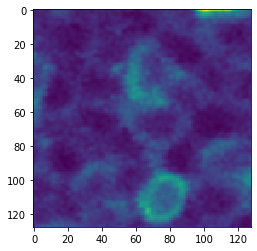

In [12]:
avg_image = (AverageFrame & key).fetch1('average_frame')
plt.imshow(avg_image)

In [13]:
avg_image = AverageFrame.fetch('average_frame')

In [14]:
avg_image

array([array([[32.73, 30.77, 31.74, ..., 65.76, 62.77, 58.65],
       [30.07, 27.96, 28.74, ..., 60.11, 58.1 , 54.59],
       [28.91, 27.02, 27.12, ..., 58.01, 56.1 , 53.25],
       ...,
       [35.17, 35.56, 34.37, ..., 21.08, 21.45, 21.09],
       [33.14, 35.73, 37.64, ..., 20.42, 21.24, 21.51],
       [33.52, 37.65, 41.71, ..., 19.82, 20.29, 21.36]]),
       array([[ 29.53,  30.8 ,  30.96, ..., 230.09, 230.78, 228.19],
       [ 29.61,  29.69,  30.71, ..., 224.86, 227.21, 227.22],
       [ 29.61,  28.28,  30.19, ..., 220.51, 224.43, 224.85],
       ...,
       [ 23.67,  23.05,  24.06, ...,  32.54,  32.07,  35.28],
       [ 24.03,  22.45,  22.4 , ...,  31.67,  30.75,  32.72],
       [ 25.78,  23.27,  21.92, ...,  31.12,  31.29,  32.94]]),
       array([[41.55, 40.2 , 38.3 , ..., 55.67, 57.17, 58.65],
       [43.66, 42.2 , 38.59, ..., 50.35, 54.83, 57.9 ],
       [42.07, 41.46, 38.3 , ..., 49.46, 52.67, 55.61],
       ...,
       [30.04, 31.05, 30.92, ..., 45.04, 44.93, 44.81],
       

In [15]:
avg_image[0]

array([[32.73, 30.77, 31.74, ..., 65.76, 62.77, 58.65],
       [30.07, 27.96, 28.74, ..., 60.11, 58.1 , 54.59],
       [28.91, 27.02, 27.12, ..., 58.01, 56.1 , 53.25],
       ...,
       [35.17, 35.56, 34.37, ..., 21.08, 21.45, 21.09],
       [33.14, 35.73, 37.64, ..., 20.42, 21.24, 21.51],
       [33.52, 37.65, 41.71, ..., 19.82, 20.29, 21.36]])

In [17]:
avg_image = (AverageFrame & key).fetch1('average_frame')

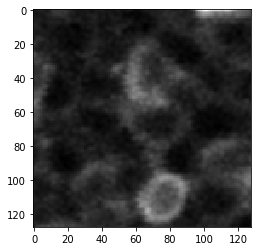

In [18]:
plt.imshow(avg_image, cmap=plt.cm.gray)

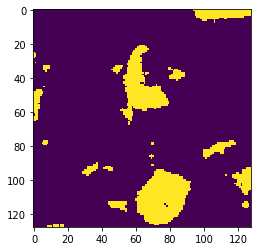

In [19]:
threshold = 50
mask = avg_image > threshold
plt.imshow(mask)

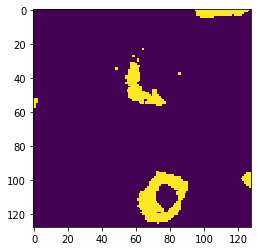

In [20]:
threshold = 60
mask = avg_image > threshold
plt.imshow(mask)

In [21]:
from scipy import ndimage

10


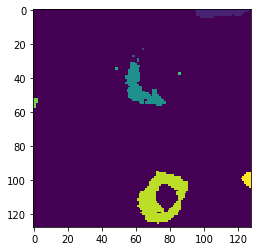

In [22]:
label_im, nb_labels = ndimage.label(mask)
print(nb_labels)
plt.imshow(label_im)

In [23]:
np.unique(label_im)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

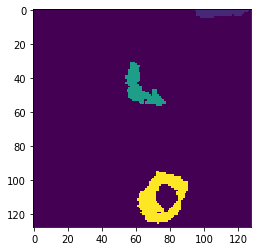

In [24]:
size_cutoff = 50
sizes = np.array([np.sum(label_im==i) for i in np.unique(label_im)])

small_size_filter = sizes < size_cutoff
pixel_to_remove = small_size_filter[label_im]

label_im[pixel_to_remove] = 0
plt.imshow(label_im)

In [25]:
rois = []
for i in np.unique(label_im)[1:]: # 0 is the background
    rois.append(label_im == i)


In [26]:
rois

[array([[False, False, False, ...,  True,  True, False],
        [False, False, False, ...,  True, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

In [27]:

@schema
class SegmentationParam(dj.Lookup):
    definition = """
    seg_param_id        : int      # unique id for cell segmentation parameter set
    ---
    threshold           : float
    size_cutoff         : float
    """

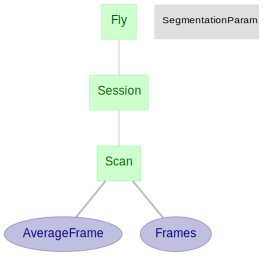

In [28]:
dj.ERD(schema)

In [34]:
@schema
class Segmentation(dj.Computed):
    definition = """
    -> AverageFrame
    -> SegmentationParam
    ---
    segmented_masks         : longblob   # overview of segmented masks
    """
    class Roi(dj.Part):
        definition = """
        -> master
        roi_idx             : int        # index of an roi
        ---
        mask                : longblob   # mask of this roi
        """

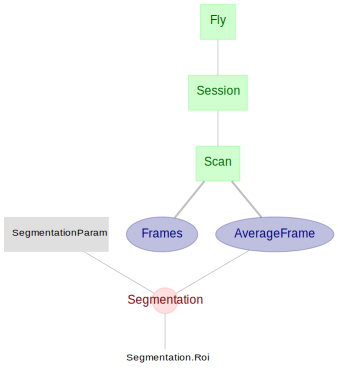

In [35]:
dj.ERD(schema)

In [85]:
@schema
class Segmentation(dj.Computed):
    definition = """
    -> AverageFrame
    -> SegmentationParam
    ---
    segmented_masks         : longblob   # overview of segmented masks
    """
    class Roi(dj.Part):
        definition = """
        -> master
        roi_idx             : int        # index of an roi
        ---
        mask                : longblob   # mask of this roi
        """
    
    def make(self, key): # key is one of the primary keys of the join product of AverageFrame and ParameterSet
        threshold,size_cutoff = (SegmentationParam & key).fetch1('threshold','size_cutoff')
        avg_image=(AverageFrame & key).fetch1('average_frame')
        
        mask = avg_image > threshold
        label_im, nb_labels = ndimage.label(mask)
        
        sizes = np.array([np.sum(label_im==i) for i in np.unique(label_im)])

        small_size_filter = sizes < size_cutoff
        pixel_to_remove = small_size_filter[label_im]

        label_im[pixel_to_remove] = 0
        rois=[]
        
        for n in np.unique(label_im[1:]):
            rois.append(dict(**key,       # inherit primary key from master table
                     roi_idx=n,    
                     mask=label_im==n))
            
        self.insert1(
            dict(**key, segmented_masks=label_im)
        )
        
        self.Roi.insert(rois)
        
        

In [118]:
@schema
class Segmentation(dj.Computed):
    definition = """
    -> AverageFrame
    -> SegmentationParam
    ---
    segmented_masks         : longblob   # overview of segmented masks
    """
    class Roi(dj.Part):
        definition = """
        -> master
        roi_idx             : int        # index of an roi
        ---
        mask                : longblob   # mask of this roi
        """
    
    def make(self, key): # key is one of the primary keys of the join product of AverageFrame and ParameterSet
        
        print('Populating for: ', key)
        
        # fetch average image from the previous table AverageFrame
        avg_image = (AverageFrame & key).fetch1('average_frame')
        
        # fetch the parameters threshold and size_cutoff
        threshold, size_cutoff = (SegmentationParam & key).fetch1(
            'threshold', 'size_cutoff')
        
        # perform the thresholding and blob detection
        mask = avg_image > threshold
        label_im, nb_labels = ndimage.label(mask)
        sizes = np.array([np.sum(label_im==i) for i in np.unique(label_im)])

        small_size_filter = sizes < size_cutoff
        pixel_to_remove = small_size_filter[label_im]

        label_im[pixel_to_remove] = 0
        
        rois = []
        for i in np.unique(label_im)[1:]: # 0 is the background
            rois.append(
                dict(**key,       # inherit primary key from master table
                     roi_idx=i,    
                     mask=label_im==i))
        
        # insert into the master table first
        self.insert1(
            dict(**key, segmented_masks=label_im)
        )
        print('Detected {} ROIs!\n'.format(len(rois)))
        # then insert into the part table
        self.Roi.insert(rois)

In [120]:
Segmentation.Roi()

fly_id Unique animal ID,session_date date,scan_idx scan index,seg_param_id unique id for cell segmentation parameter set,roi_idx index of an roi,mask mask of this roi
0,2020-05-15,1,0,1,=BLOB=
0,2020-05-15,1,0,2,=BLOB=
0,2020-05-15,1,0,11,=BLOB=
0,2020-05-15,1,0,14,=BLOB=
0,2020-05-15,1,0,20,=BLOB=
0,2020-05-15,1,0,21,=BLOB=
0,2020-05-15,1,1,0,=BLOB=
0,2020-05-15,1,1,1,=BLOB=
0,2020-05-15,1,1,5,=BLOB=
0,2020-05-15,1,1,9,=BLOB=


In [119]:
Segmentation.populate()

Populating for:  {'fly_id': 0, 'session_date': datetime.date(2020, 5, 15), 'scan_idx': 1, 'seg_param_id': 0}
Detected 6 ROIs!

Populating for:  {'fly_id': 0, 'session_date': datetime.date(2020, 5, 15), 'scan_idx': 2, 'seg_param_id': 0}
Detected 6 ROIs!

Populating for:  {'fly_id': 100, 'session_date': datetime.date(2020, 5, 25), 'scan_idx': 1, 'seg_param_id': 0}
Detected 9 ROIs!



In [102]:
Segmentation()

fly_id Unique animal ID,session_date date,scan_idx scan index,seg_param_id unique id for cell segmentation parameter set,segmented_masks overview of segmented masks
0,2020-05-15,1,0,=BLOB=
0,2020-05-15,2,0,=BLOB=
100,2020-05-25,1,0,=BLOB=
0,2020-05-15,1,1,=BLOB=
0,2020-05-15,2,1,=BLOB=
100,2020-05-25,1,1,=BLOB=


In [103]:

SegmentationParam.insert1((0, 50, 50))

DuplicateError: ("Duplicate entry '0' for key 'PRIMARY'", 'To ignore duplicate entries in insert, set skip_duplicates=True')

In [104]:
Segmentation.populate()

In [116]:
Segmentation()

fly_id Unique animal ID,session_date date,scan_idx scan index,seg_param_id unique id for cell segmentation parameter set,segmented_masks overview of segmented masks
0,2020-05-15,1,1,=BLOB=
0,2020-05-15,2,1,=BLOB=
100,2020-05-25,1,1,=BLOB=


In [106]:
SegmentationParam.insert1((1, 60, 50))

DuplicateError: ("Duplicate entry '1' for key 'PRIMARY'", 'To ignore duplicate entries in insert, set skip_duplicates=True')

In [107]:
Segmentation.populate()

In [108]:
Segmentation()

fly_id Unique animal ID,session_date date,scan_idx scan index,seg_param_id unique id for cell segmentation parameter set,segmented_masks overview of segmented masks
0,2020-05-15,1,0,=BLOB=
0,2020-05-15,2,0,=BLOB=
100,2020-05-25,1,0,=BLOB=
0,2020-05-15,1,1,=BLOB=
0,2020-05-15,2,1,=BLOB=
100,2020-05-25,1,1,=BLOB=


In [109]:
(Segmentation & 'seg_param_id = 0').delete()

About to delete
`root_hw6`.`__segmentation__roi`: 21 items
`root_hw6`.`__segmentation`: 3 items
Proceed? [yes, No]: yes
Commited.


In [110]:
Segmentation()

fly_id Unique animal ID,session_date date,scan_idx scan index,seg_param_id unique id for cell segmentation parameter set,segmented_masks overview of segmented masks
0,2020-05-15,1,1,=BLOB=
0,2020-05-15,2,1,=BLOB=
100,2020-05-25,1,1,=BLOB=


32


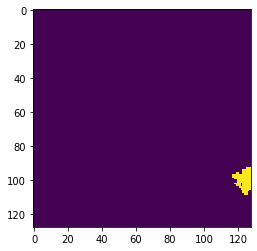

In [121]:
# show one example ROI
masks = (Segmentation.Roi).fetch('mask')
print(len(masks))
plt.imshow(masks[4])

In [122]:
from skimage import io
import os
@schema
class Fluorescence(dj.Computed):
    definition = """
    -> Frames
    -> Segmentation
    ---
    time    : longblob    # time for each frame
    """
    
    class Trace(dj.Part):
        definition = """
        -> master
        -> Segmentation.Roi
        ---
        trace      :  longblob    # fluorescence trace of each ROI
        """
          
    # the master table is mainly to perform the computation, while the part table contains the result
    def make(self, key):
        
        print('Populating: {}'.format(key))
        # get movie from Frames
        im = (Frames & key).fetch1('frames')
        
        # get dimensions of the image and reshape
        n, w, h = np.shape(im)
        im_reshaped = np.reshape(im, [n, w*h])
        
        # get frames per second to compute time
        fps = (Scan & key).fetch1('fps')
        
        # insert into master table first
        self.insert1(dict(**key, time=np.array(range(n))/fps))
        
        
        # extract traces
        roi_keys, masks = (Segmentation.Roi & key).fetch('KEY', 'mask')
        
        traces = []
        for roi_key, mask in zip(roi_keys, masks):
            
            # reshape mask
            mask_reshaped = np.reshape(mask, [w*h])
            trace = np.mean(im_reshaped[:, mask_reshaped], axis=1)
            
            traces.append(dict(**roi_key, trace=trace))
        
        self.Trace.insert(traces)

In [123]:
Fluorescence.populate()

Populating: {'fly_id': 100, 'session_date': datetime.date(2020, 5, 25), 'scan_idx': 1, 'seg_param_id': 0}
Populating: {'fly_id': 100, 'session_date': datetime.date(2020, 5, 25), 'scan_idx': 1, 'seg_param_id': 1}
Populating: {'fly_id': 0, 'session_date': datetime.date(2020, 5, 15), 'scan_idx': 2, 'seg_param_id': 0}


C:\Users\Lboyl\Anaconda3\envs\dockerenv\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Lboyl\Anaconda3\envs\dockerenv\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\Users\Lboyl\Anaconda3\envs\dockerenv\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Lboyl\Anaconda3\envs\dockerenv\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


Populating: {'fly_id': 0, 'session_date': datetime.date(2020, 5, 15), 'scan_idx': 2, 'seg_param_id': 1}
Populating: {'fly_id': 0, 'session_date': datetime.date(2020, 5, 15), 'scan_idx': 1, 'seg_param_id': 0}
Populating: {'fly_id': 0, 'session_date': datetime.date(2020, 5, 15), 'scan_idx': 1, 'seg_param_id': 1}


In [132]:
Fluorescence()

fly_id Unique animal ID,session_date date,scan_idx scan index,seg_param_id unique id for cell segmentation parameter set,time time for each frame
0,2020-05-15,1,0,=BLOB=
0,2020-05-15,1,1,=BLOB=
0,2020-05-15,2,0,=BLOB=
0,2020-05-15,2,1,=BLOB=
100,2020-05-25,1,0,=BLOB=
100,2020-05-25,1,1,=BLOB=


Text(0, 0.5, 'Fluorescence')

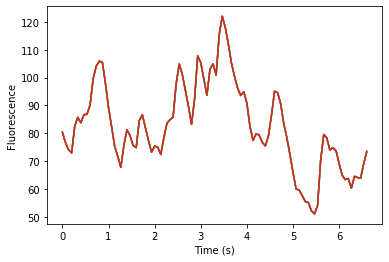

In [131]:
key = dict(fly_id=0, session_number=1, scan_idx=1, seg_param_id=1)

# ENTER YOUR CODE! - fetch 'time' from the Fluorescence table using fetch1()
time = (Fluorescence & key).fetch1('time')

# ENTER YOUR CODE! - fetch 'trace' from the Fluorescence.Trace table using fetch()
traces = (Fluorescence.Trace & key).fetch('trace')

plt.plot(time, np.vstack(traces).T)
plt.xlabel('Time (s)')
plt.ylabel('Fluorescence')

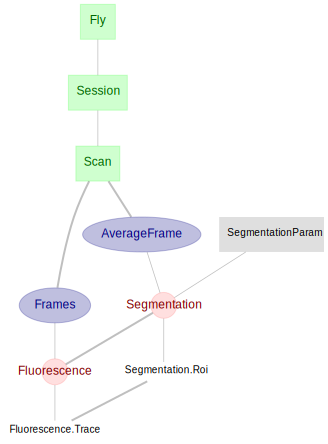

In [133]:
dj.ERD(schema)